# Többváltozós analízis mérnöki alkalmazásai projekt

## Snake

### Hogy állunk jelenleg?

- A játék egy objektumon keresztül folyik
- A megjelenítés még nem az igazi
- A pálya zárt, négyzet alakú. (Nem lehet átmenni a falon mint egy topológialag tórusznak tekinthető pályán)

In [68]:
import numpy as np
from matplotlib import pyplot as plt
import random
import time

In [69]:
class kigyo:
    palyaSize = 50 #hányszor hányas legyen a pálya
    palya = np.ones((palyaSize,palyaSize))
    fej = (25,25)#legyen monajuk a pálya közepén (parametrikusan elegánsabb)
    snake = []#ebbe a tömbbe pakoljuk a kígyó testét
    snake.append(fej)#rakjuk is bele a fejét
    snake.append((fej[0]-1,fej[1]))
    snake.append((fej[0]-2,fej[1]))
    kaja = (20,25)#hol van a kaja
    isAlive = True #él e még az adott példány
    steps = 0 #hány lépést élt meg az adott példány... (ez az AIhoz jöhet jól)
    #Egy konstruktor biztosan nem árt meg...
    def __init__(self,nev):
        self.name = nev #ez még nem fontos ,de később még jól jöhet 
    def ujKaja(self):#Arra majd még figyelni kell hogy az új kaja ne legyen a kígyóban...
        x = random.randint(0,self.palyaSize)#Véletlenszerűen új helyet keresünk neki
        y = random.randint(0,self.palyaSize)
        return (x,y)
    #hogy mozogni is tudjon...
    def move(self,direction):
        if(direction == 0):#felfele megy
            self.fej = (self.fej[0]-1,self.fej[1])
            self.utkozike() #Meghaltunk-e?
            #kajál -e?
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)#Ez esetben csak nő
                self.kaja= self.ujKaja()#Új kaját kell generálni
            else:
                self.snake.pop()#A végét levágjuk
                self.snake.insert(0,self.fej)#megy tovább a fej irányába
        #jobbra megy
        if(direction == 1):
            self.fej = (self.fej[0],self.fej[1]+1)
            self.utkozike()
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)
                self.kaja= self.ujKaja()
            else:
                self.snake.pop()
                self.snake.insert(0,self.fej)
        #lefelé megy
        if(direction == 2):
            self.fej = (self.fej[0]+1,self.fej[1])
            self.utkozike()
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)
                self.kaja= self.ujKaja()
            else:
                self.snake.pop()
                self.snake.insert(0,self.fej)
        #balra megy
        if(direction == 3):
            self.fej = (self.fej[0],self.fej[1]-1)
            self.utkozike()
            #kajál -e?
            if (self.fej == self.kaja):
                self.snake.insert(0,self.fej)
                self.kaja= self.ujKaja()
            else:
                self.snake.pop()
                self.snake.insert(0,self.fej)        
        
    #Hogy ki is rajzolhassuk
    def mutat(self):
        self.palya= np.zeros((self.palyaSize,self.palyaSize))#Tisztítsuk meg a palyat
        for i in self.snake:
            self.palya[i]=1 #ahol a kigyo van ott legyen 1
        self.palya[self.kaja]=0.5 #ahol a kaja van ott pedig 0
        plt.imshow(self.palya, cmap='gray')
        #Ha a következő sort kikommentelitek akkor pedig mindig új ábrát hoz létre...
        #plt.show()
    def utkozike(self):
        if(self.fej[0]==-1 or self.fej[0]==self.palyaSize or self.fej[1]==-1 or self.fej[1]==self.palyaSize):
            print("meghaltal")#Ha kimegy a pályáról
            self.isAlive = False
        elif(self.fej in self.snake[:-1]):
            print("meghaltal")#Ha önmagába ütközik
            self.isAlive = False
    

[(25, 26), (25, 25), (24, 25)]
[(26, 26), (25, 26), (25, 25)]
[(27, 26), (26, 26), (25, 26)]
[(28, 26), (27, 26), (26, 26)]
[(28, 25), (28, 26), (27, 26)]
[(29, 25), (28, 25), (28, 26)]
[(29, 24), (29, 25), (28, 25)]
[(28, 24), (29, 24), (29, 25)]
[(28, 25), (28, 24), (29, 24)]
meghaltal
[(28, 24), (28, 25), (28, 24)]


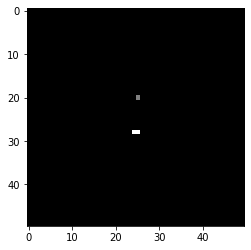

In [70]:
#itt lehet próbálgatni a funkciókat...
pl = kigyo("elso")
#pl.mutat()
#print(pl.snake)
for i in range(100): # véletlen lépegetés
    irany = random.randint(0,3)
    if(pl.isAlive):
        pl.move(irany)  
        print(pl.snake)# Ez csak azért van itt hogy lássuk merre megy. Amúgy majd kikommentelendő
pl.mutat()
del pl